In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re

In [2]:
pl = pd.read_csv('QuangNam_Infor.csv')
pl.head()


,HAddress,HAttractions,HGFW,HImages,HLanguage,HName,HPMax,HPMin,HPRange,HQuestions,...,HRNumber,HRank,HRankreview,HRating,HRestaurants,HReview,HRoom,HStyles,HVideos,URL
0,"19 Lac Long Quan Cam An, Hoi An 560000 Vietnam",7.0,86.0,2003.0,"English, French, Spanish, Filipino",Little Beach A Boutique Hotel & Spa,$73,NaN,"$42, - ,$73",Which popular attractions are close to Little ...,...,"2,699",#5 of 268 hotels in Hoi An,5.0,4.0 of 5 bubbles,57.0,Excellent,106,"Ocean View,Boutique",16.0,https://www.tripadvisor.com/Hotel_Review-g2980...
1,"35 Dao Duy Tu Street Song Hoai Square, Hoi An ...",30.0,100.0,1562.0,Vietnamese,La Residencia . A Little Boutique Hotel & Spa,$71,NaN,"$38, - ,$71",Which popular attractions are close to La Resi...,...,"2,778",#11 of 268 hotels in Hoi An,5.0,4.0 of 5 bubbles,85.0,Excellent,49,"Boutique,Mid-range",306.0,https://www.tripadvisor.com/Hotel_Review-g2980...
2,"Cua Dai Beach, Hoi An Vietnam",9.0,73.0,2499.0,Vietnamese,Victoria Hoi An Beach Resort & Spa,$178,NaN,"$87, - ,$178",Which popular attractions are close to Victori...,...,"2,868",#10 of 27 resorts in Hoi An,4.5,4.0 of 5 bubbles,69.0,Excellent,109,"Ocean View,Family",208.0,https://www.tripadvisor.com/Hotel_Review-g2980...
3,"1 Pham Hong Thai Street, Hoi An 880000 Vietnam",140.0,94.0,1526.0,"English, French, Arabic, Chinese",Anantara Hoi An Resort,$246,NaN,"$101, - ,$246",Which popular attractions are close to Anantar...,...,"2,882",#8 of 27 resorts in Hoi An,4.5,4.0 of 5 bubbles,102.0,Excellent,94,"River View,Centrally Located",2.0,https://www.tripadvisor.com/Hotel_Review-g2980...
4,"132 Hung Vuong Street Thanh Ha Ward, Hoi An Vi...",2.0,77.0,250.0,NaN,Essence Hoi An Hotel & Spa,$224,NaN,"$63, - ,$224",Which popular attractions are close to Essence...,...,"2,974",#53 of 268 hotels in Hoi An,5.0,4.0 of 5 bubbles,17.0,Excellent,38,"Family,Mid-range",48.0,https://www.tripadvisor.com/Hotel_Review-g2980...


In [4]:
pl.describe()

,HAttractions,HGFW,HImages,HRImages,HRankreview,HRestaurants,HVideos
count,1033.000000,984.000000,637.000000,637.000000,956.000000,1033.000000,832.000000
mean,51.291384,72.970528,136.681319,32.706436,11.187762,91.406583,17.707933
std,100.179245,24.251609,339.867590,89.763632,16.495566,142.383297,70.519595
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,65.000000,15.000000,7.000000,4.000000,20.000000,1.000000
50%,7.000000,78.000000,33.000000,15.000000,5.000000,43.000000,3.000000
75%,37.000000,91.250000,86.000000,29.000000,5.000000,102.000000,10.000000
max,604.000000,100.000000,2941.000000,1642.000000,50.000000,1228.000000,1276.000000


In [5]:
na = len(pl[pl["HAttractions"]==0])
print('Tỉ lệ dữ liệu trống', na/len(pl)*100,"%")

Tỉ lệ dữ liệu trống 15.87015329125338 %


In [6]:
na = len(pl[pl["HGFW"]==0])
print('Tỉ lệ dữ liệu trống', na/len(pl)*100,"%")

Tỉ lệ dữ liệu trống 5.139765554553652 %


In [7]:
na = len(pl[pl["HImages"]==0])
print('Tỉ lệ dữ liệu trống', na/len(pl)*100,"%")

Tỉ lệ dữ liệu trống 0.0 %


In [8]:
na = len(pl[pl["HRImages"]==0])
print('Tỉ lệ dữ liệu trống', na/len(pl)*100,"%")

Tỉ lệ dữ liệu trống 0.0 %


In [9]:
na = len(pl[pl["HRankreview"]==0])
print('Tỉ lệ dữ liệu trống', na/len(pl)*100,"%")

Tỉ lệ dữ liệu trống 15.779981965734896 %


In [10]:
na = len(pl[pl["HRestaurants"]==0])
print('Tỉ lệ dữ liệu trống', na/len(pl)*100,"%")

Tỉ lệ dữ liệu trống 9.558160504959423 %


In [11]:
na = len(pl[pl["HVideos"]==0])
print('Tỉ lệ dữ liệu trống', na/len(pl)*100,"%")

Tỉ lệ dữ liệu trống 17.583408476104598 %


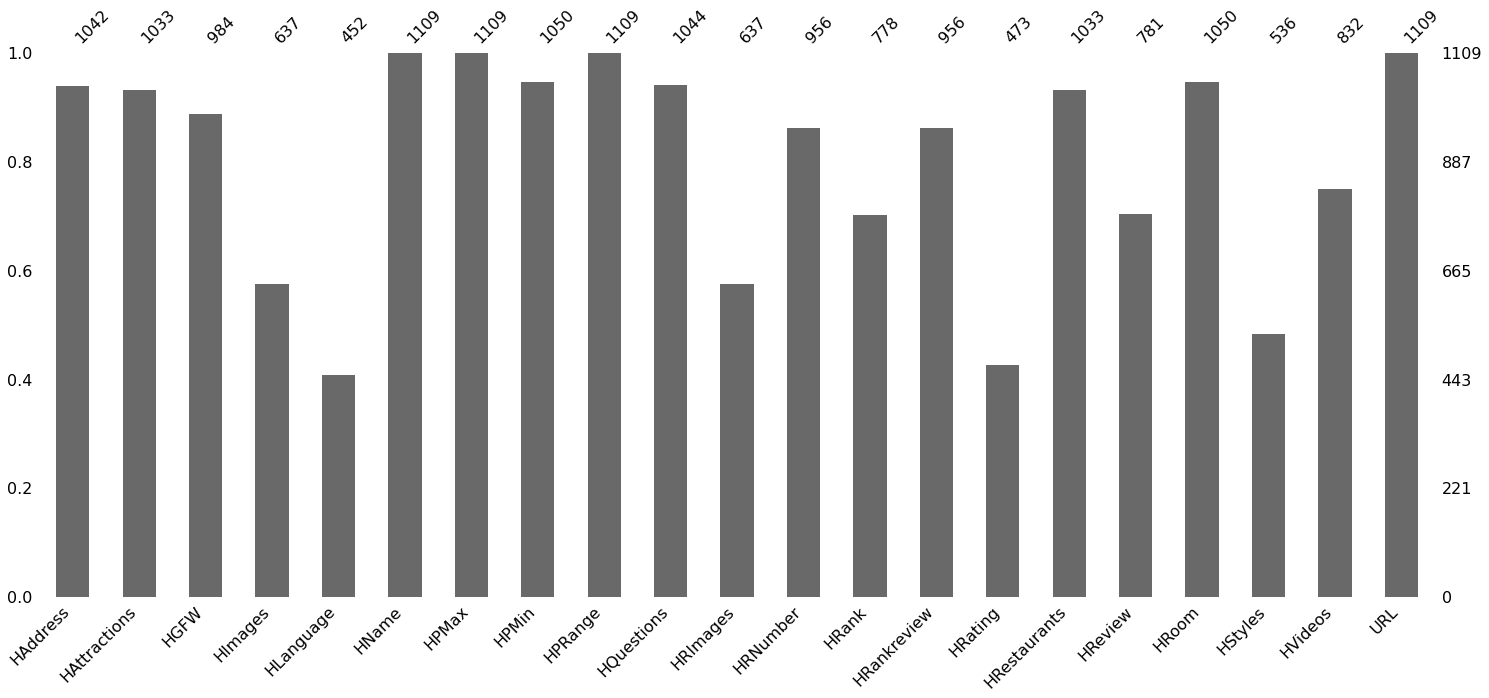

In [3]:
import missingno as msno
msno.bar(pl)

Số lượng xếp hạng đánh giá tại các khách sạn ở Quảng Nam là:  5
     HReview  Số khách sạn
1  Excellent           679
4  Very good            72
0    Average            18
3   Terrible             8
2       Poor             4


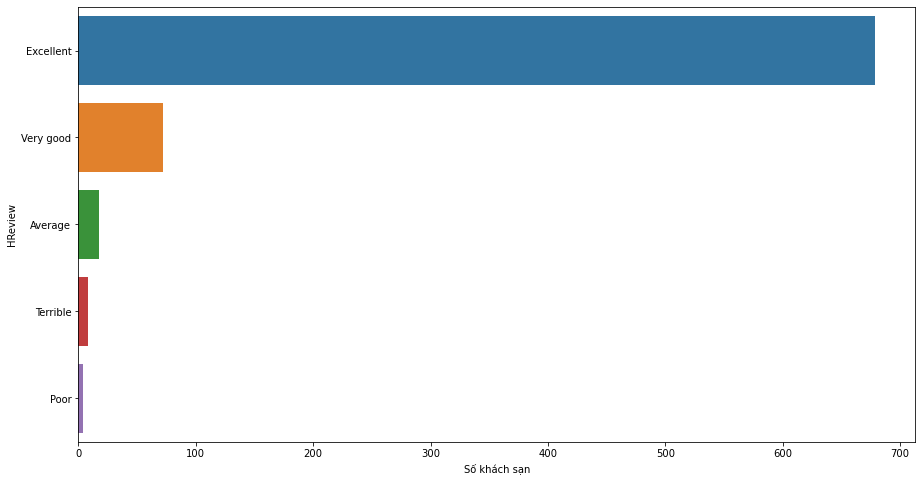

In [11]:
a = pl.groupby("HReview").size().reset_index(name='Số khách sạn')
h = pd.DataFrame(a)
print("Số lượng xếp hạng đánh giá tại các khách sạn ở Quảng Nam là: ", len(h))
df_type = h.nlargest(10, 'Số khách sạn')
print(df_type)
fig = plt.figure(figsize =(15, 8))
ax = sns.barplot(x="Số khách sạn", y="HReview", data=df_type)

In [5]:
rv = pd.read_csv('QuangNam.csv')
rv.head()

,HComment,HCommenter,HContribute,HDate,HThanks,HTime,HTravelType,HTravelerRating,h_Hotel_name,h_reviewer_address,h_reviewer_id,h_title_comment,h_url
0,This hotel so near the Cua Dai Beach with the ...,LENAERTS RAYAN,3.0,Date of stay: December 2019,NaN,Jun-20,NaN,50.0,Little Beach A Boutique Hotel & Spa,NaN,https://www.tripadvisor.com/Profile/lenaerts0512,Near the beach,https://www.tripadvisor.com/Hotel_Review-g2980...
1,Our party of 5 stayed at Little Beach for 4 we...,Jane J,4.0,Date of stay: February 2020,2.0,May-20,NaN,50.0,Little Beach A Boutique Hotel & Spa,Coleshill,https://www.tripadvisor.com/Profile/21janej,Vietnam hospitality at its best,https://www.tripadvisor.com/Hotel_Review-g2980...
2,Beautiful fairly new hotel in Hoi An! Fabulous...,BobV_7,39.0,Date of stay: March 2020,76.0,Apr-20,NaN,50.0,Little Beach A Boutique Hotel & Spa,"Lenexa, Kansas",https://www.tripadvisor.com/Profile/BobV_7,Wonderful hotel in Hoi An,https://www.tripadvisor.com/Hotel_Review-g2980...
3,We visited this great hotel after much trama w...,Elaine E,9.0,Date of stay: March 2020,4.0,Apr-20,Traveled as a couple,50.0,Little Beach A Boutique Hotel & Spa,"Sittingbourne, United Kingdom",https://www.tripadvisor.com/Profile/elainee936,Fabulous,https://www.tripadvisor.com/Hotel_Review-g2980...
4,Little Beach is a Fantastic hotel!\r\n\r\nIt h...,Christine P,9.0,Date of stay: March 2020,NaN,Mar-20,Traveled as a couple,50.0,Little Beach A Boutique Hotel & Spa,"Secret Harbour, Australia",https://www.tripadvisor.com/Profile/chrissypad...,The most amazing bed we’ve ever slept in,https://www.tripadvisor.com/Hotel_Review-g2980...


In [8]:
#Tao cot thang luu tru tu cot ngay luu tru
rv["Month of stay"] = rv["HDate"].apply(lambda x: "".join(re.findall(r'(Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)', str(x))))
rv

,HComment,HCommenter,HContribute,HDate,HThanks,HTime,HTravelType,HTravelerRating,h_Hotel_name,h_reviewer_address,h_reviewer_id,h_title_comment,h_url,Month of stay
0,This hotel so near the Cua Dai Beach with the ...,LENAERTS RAYAN,3.0,Date of stay: December 2019,NaN,Jun-20,NaN,50.0,Little Beach A Boutique Hotel & Spa,NaN,https://www.tripadvisor.com/Profile/lenaerts0512,Near the beach,https://www.tripadvisor.com/Hotel_Review-g2980...,December
1,Our party of 5 stayed at Little Beach for 4 we...,Jane J,4.0,Date of stay: February 2020,2.0,May-20,NaN,50.0,Little Beach A Boutique Hotel & Spa,Coleshill,https://www.tripadvisor.com/Profile/21janej,Vietnam hospitality at its best,https://www.tripadvisor.com/Hotel_Review-g2980...,February
2,Beautiful fairly new hotel in Hoi An! Fabulous...,BobV_7,39.0,Date of stay: March 2020,76.0,Apr-20,NaN,50.0,Little Beach A Boutique Hotel & Spa,"Lenexa, Kansas",https://www.tripadvisor.com/Profile/BobV_7,Wonderful hotel in Hoi An,https://www.tripadvisor.com/Hotel_Review-g2980...,March
3,We visited this great hotel after much trama w...,Elaine E,9.0,Date of stay: March 2020,4.0,Apr-20,Traveled as a couple,50.0,Little Beach A Boutique Hotel & Spa,"Sittingbourne, United Kingdom",https://www.tripadvisor.com/Profile/elainee936,Fabulous,https://www.tripadvisor.com/Hotel_Review-g2980...,March
4,Little Beach is a Fantastic hotel!\r\n\r\nIt h...,Christine P,9.0,Date of stay: March 2020,NaN,Mar-20,Traveled as a couple,50.0,Little Beach A Boutique Hotel & Spa,"Secret Harbour, Australia",https://www.tripadvisor.com/Profile/chrissypad...,The most amazing bed we’ve ever slept in,https://www.tripadvisor.com/Hotel_Review-g2980...,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47620,We stayed four nights at the magnolia homestay...,karoboe,5.0,Oct-13,1.0,Nov-13,NaN,50.0,Magnolia Garden Villa,NaN,https://www.tripadvisor.com/Profile/karoboe,We love this place and will for sure stay ther...,https://www.tripadvisor.com/Hotel_Review-g2980...,Oct
47621,we stayed here for 3 nights and although it wa...,Miriam H,1.0,Sep-13,1.0,Oct-13,Traveled as a couple,50.0,Camellia Homestay,"Augsburg, Germany",https://www.tripadvisor.com/Profile/705miriamh,best place to stay in hoi an,https://www.tripadvisor.com/Hotel_Review-g2980...,Sep
47622,We stayed at Magnolia for 2 nights while visit...,combatgoose,182.0,Sep-13,41.0,Sep-13,Traveled as a couple,50.0,Magnolia Garden Villa,"Malaga, Spain",https://www.tripadvisor.com/Profile/combatgoose,Great hospitality and comfort,https://www.tripadvisor.com/Hotel_Review-g2980...,Sep
47623,We just spend an incredible 4 nights with the ...,jheron1990,11.0,Sep-13,5.0,Oct-13,Traveled as a couple,50.0,Camellia Homestay,N.Ireland,https://www.tripadvisor.com/Profile/jheron1990,A home from home!,https://www.tripadvisor.com/Hotel_Review-g2980...,Sep


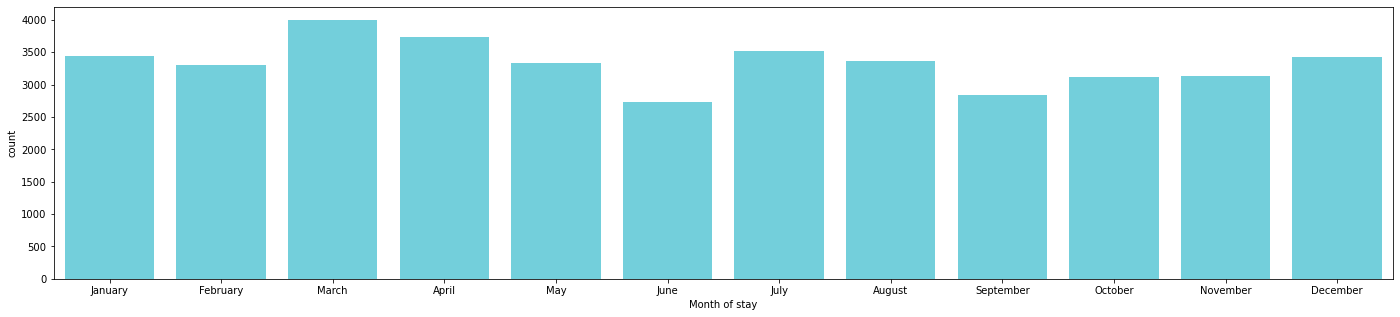

In [9]:
# Plotting number of reviews in each month
plt.figure(figsize = (24, 5))
month =['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.despine()
sns.countplot(x="Month of stay", data=rv, order=month, color='#62DCEC');

In [6]:
rv["Year of stay"] = rv["HDate"].apply(lambda x: "".join(re.findall("\d\d\d\d", str(x))))
rv

,HComment,HCommenter,HContribute,HDate,HThanks,HTime,HTravelType,HTravelerRating,h_Hotel_name,h_reviewer_address,h_reviewer_id,h_title_comment,h_url,Year of stay
0,This hotel so near the Cua Dai Beach with the ...,LENAERTS RAYAN,3.0,Date of stay: December 2019,NaN,Jun-20,NaN,50.0,Little Beach A Boutique Hotel & Spa,NaN,https://www.tripadvisor.com/Profile/lenaerts0512,Near the beach,https://www.tripadvisor.com/Hotel_Review-g2980...,2019
1,Our party of 5 stayed at Little Beach for 4 we...,Jane J,4.0,Date of stay: February 2020,2.0,May-20,NaN,50.0,Little Beach A Boutique Hotel & Spa,Coleshill,https://www.tripadvisor.com/Profile/21janej,Vietnam hospitality at its best,https://www.tripadvisor.com/Hotel_Review-g2980...,2020
2,Beautiful fairly new hotel in Hoi An! Fabulous...,BobV_7,39.0,Date of stay: March 2020,76.0,Apr-20,NaN,50.0,Little Beach A Boutique Hotel & Spa,"Lenexa, Kansas",https://www.tripadvisor.com/Profile/BobV_7,Wonderful hotel in Hoi An,https://www.tripadvisor.com/Hotel_Review-g2980...,2020
3,We visited this great hotel after much trama w...,Elaine E,9.0,Date of stay: March 2020,4.0,Apr-20,Traveled as a couple,50.0,Little Beach A Boutique Hotel & Spa,"Sittingbourne, United Kingdom",https://www.tripadvisor.com/Profile/elainee936,Fabulous,https://www.tripadvisor.com/Hotel_Review-g2980...,2020
4,Little Beach is a Fantastic hotel!\r\n\r\nIt h...,Christine P,9.0,Date of stay: March 2020,NaN,Mar-20,Traveled as a couple,50.0,Little Beach A Boutique Hotel & Spa,"Secret Harbour, Australia",https://www.tripadvisor.com/Profile/chrissypad...,The most amazing bed we’ve ever slept in,https://www.tripadvisor.com/Hotel_Review-g2980...,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47620,We stayed four nights at the magnolia homestay...,karoboe,5.0,Oct-13,1.0,Nov-13,NaN,50.0,Magnolia Garden Villa,NaN,https://www.tripadvisor.com/Profile/karoboe,We love this place and will for sure stay ther...,https://www.tripadvisor.com/Hotel_Review-g2980...,
47621,we stayed here for 3 nights and although it wa...,Miriam H,1.0,Sep-13,1.0,Oct-13,Traveled as a couple,50.0,Camellia Homestay,"Augsburg, Germany",https://www.tripadvisor.com/Profile/705miriamh,best place to stay in hoi an,https://www.tripadvisor.com/Hotel_Review-g2980...,
47622,We stayed at Magnolia for 2 nights while visit...,combatgoose,182.0,Sep-13,41.0,Sep-13,Traveled as a couple,50.0,Magnolia Garden Villa,"Malaga, Spain",https://www.tripadvisor.com/Profile/combatgoose,Great hospitality and comfort,https://www.tripadvisor.com/Hotel_Review-g2980...,
47623,We just spend an incredible 4 nights with the ...,jheron1990,11.0,Sep-13,5.0,Oct-13,Traveled as a couple,50.0,Camellia Homestay,N.Ireland,https://www.tripadvisor.com/Profile/jheron1990,A home from home!,https://www.tripadvisor.com/Hotel_Review-g2980...,


In [7]:
rv["Year of stay"].unique()

array(['2019', '2020', '', '2018', '2017', '2016', '2015', '2014', '2013',
       '2012', '2022', '2021', '2011', '2010', '2009', '2007', '2008',
       '2005', '2006', '2004', '2003'], dtype=object)

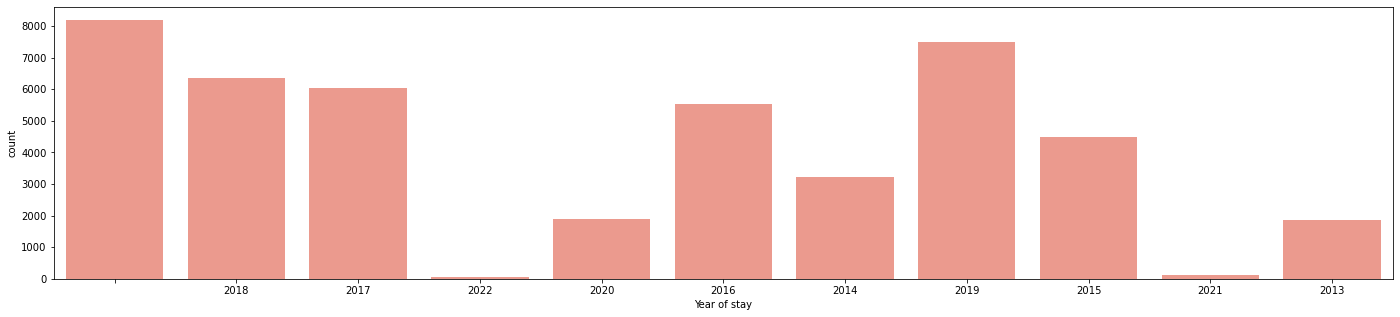

In [8]:
# Plotting number of reviews for each year
plt.figure(figsize = (24, 5))
years = ['', '2018', '2017', '2022', '2020', '2016', '2014', '2019', '2015',
       '2021', '2013']
sns.despine()
sns.countplot(x="Year of stay", data=rv, order=years, color='#FB8E7E');